<a href="https://colab.research.google.com/github/Pavan0704/Cat-Dog-Image-classification-CNN-/blob/main/Cat_%26_Dog_Image_classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

# Extract training_set.zip
with zipfile.ZipFile('/content/training_set.zip', 'r') as zip_ref:
    print(f"Contents of training_set.zip: {zip_ref.namelist()[:5]}...") # Print first 5 entries for brevity
    zip_ref.extractall('/content')

# Extract test_set.zip
with zipfile.ZipFile('/content/test_set.zip', 'r') as zip_ref:
    print(f"Contents of test_set.zip: {zip_ref.namelist()[:5]}...") # Print first 5 entries for brevity
    zip_ref.extractall('/content')

# List contents of /content to verify extraction
print("\nContents of /content after extraction:")
for item in os.listdir('/content'):
    print(item)

Contents of training_set.zip: ['training_set/', 'training_set/cats/', 'training_set/cats/cat.1025.jpg', 'training_set/cats/cat.1026.jpg', 'training_set/cats/cat.1027.jpg']...
Contents of test_set.zip: ['test_set/', 'test_set/cats/', 'test_set/cats/cat.4001.jpg', 'test_set/cats/cat.4002.jpg', 'test_set/cats/cat.4003.jpg']...

Contents of /content after extraction:
.config
training_set.zip
dog vs cat.zip
test_set.zip
test_set
training_set
sample_data


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 7970 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
#normalise
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
#create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.5547 - loss: 2.9064 - val_accuracy: 0.5155 - val_loss: 1.3330
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.5698 - loss: 0.8218 - val_accuracy: 0.5960 - val_loss: 0.6669
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.6733 - loss: 0.6116 - val_accuracy: 0.7065 - val_loss: 0.5748
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7370 - loss: 0.5332 - val_accuracy: 0.6450 - val_loss: 0.7360
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7594 - loss: 0.4883 - val_accuracy: 0.7315 - val_loss: 0.5576
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.8042 - loss: 0.4353 - val_accuracy: 0.7495 - val_loss: 0.6117
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8284 - loss: 0.3898 - val_accuracy: 0.7530 - val_loss: 0.6458
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.8694 - loss: 0.3023 -

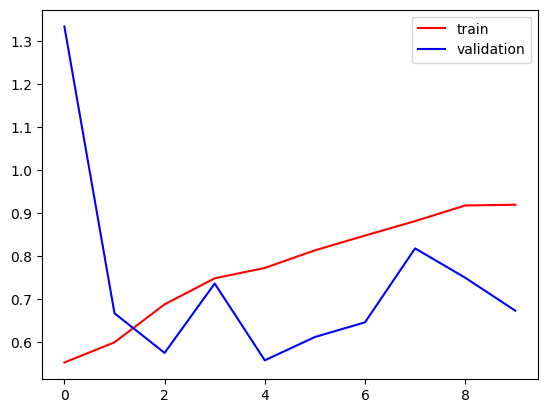

In [18]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'], color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()